<a href="https://colab.research.google.com/github/jaylee07/TF_udacity/blob/master/%5BUdacity%5Dch2_training_your_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)

## Set up training data

In [0]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Create our new model(Dense network)


In [0]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1], activation='relu')
model = tf.keras.Sequential([layer0])

In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), 
              loss = 'mean_squared_error')

## Train the model
model.fit()

In [0]:
hist = model.fit(x = celsius_q, y = fahrenheit_a, epochs = 500, verbose=False)

Text(0, 0.5, 'loss')

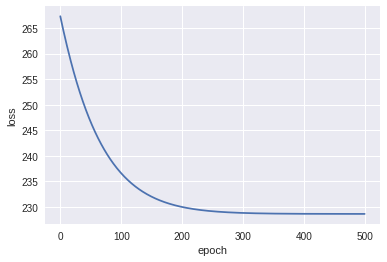

In [0]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

## Use the model to predict values
model.predict()

In [0]:
print(model.predict([100.0]))

[[211.77702]]


## Looking at the layers weight
layer.get_weights()

In [0]:
print(layer0.get_weights())

[array([[1.798635]], dtype=float32), array([31.913532], dtype=float32)]


원래, F = 1.8 * C + 32이다.
여기서, 학습한 결과는 F = 1.7986 * C + 31.9135로, 비슷하게 나오는 것을 볼 수 있음

## Additional experiment

In [0]:
add_l0 = tf.keras.layers.Dense(units = 4, input_shape = [1])
add_l1 = tf.keras.layers.Dense(units = 4)
add_l2 = tf.keras.layers.Dense(units = 1)
add_model = tf.keras.Sequential([add_l0, add_l1, add_l2])

In [0]:
add_model.compile(optimizer = tf.keras.optimizers.Adam(0.1), 
                  loss = 'mean_squared_error')
add_hist = add_model.fit(x = celsius_q, y = fahrenheit_a, 
                         epochs = 500, verbose=False)
print(add_model.predict([100.0]))

[[211.74742]]


100 Celsisus degree = 212.0000 in real, 211.7474 in prediction


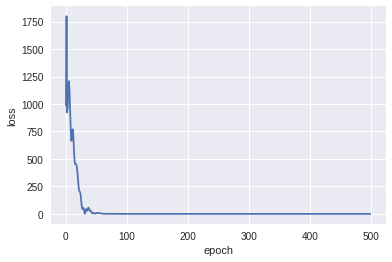

In [0]:
plt.plot(add_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
print(f'100 Celsisus degree = {100*1.8 + 32:.4f} in real, {add_model.predict([100.0])[0].item():.4f} in prediction')